In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#1️⃣ Data Exploration and Cleaning


#Load the dataset into a Pandas DataFrame and display the first 5 rows.
data = pd.read_csv("https://raw.githubusercontent.com/Pankaj-Str/Complete-Python-Mastery/refs/heads/main/53%20DataSet/credit_card_transactions.csv")

print(data.head())

   Transaction_ID  Customer_ID Transaction_Date Transaction_Type Merchant  \
0          100000         4452       2023-01-01           Online  Walmart   
1          100001         2775       2023-01-01              ATM  BestBuy   
2          100002         2259       2023-01-01   Mobile Payment     Uber   
3          100003         4545       2023-01-01           Online  BestBuy   
4          100004         2137       2023-01-01              ATM   Amazon   

   Category   Amount Payment_Mode Transaction_Status       Location  
0    Travel  4520.70   Debit Card           Approved      Jonesport  
1    Travel  1437.85   Debit Card           Approved  Port Jennifer  
2  Clothing  3320.52       PayPal           Approved     Port James  
3    Travel  2659.96   Debit Card           Approved     Hawkinston  
4    Travel  2517.07   Debit Card           Approved    Matthewland  


In [38]:
#Check the shape, column names, and summary statistics of the dataset

#shape
print('Shape of the data')
data.shape[0]

Shape of the data


5500

In [39]:
##Check the  column names
print('Column Names')
data.columns

Column Names


Index(['Transaction_ID', 'Customer_ID', 'Transaction_Date', 'Transaction_Type',
       'Merchant', 'Category', 'Amount', 'Payment_Mode', 'Transaction_Status',
       'Location'],
      dtype='object')

In [40]:
#Check the summary statistics of the dataset
print('Summary Statistics')
data.describe()

Summary Statistics


,Transaction_ID,Customer_ID,Amount
count,5500.000000,5500.000000,5500.000000
mean,102749.500000,2989.954182,2492.109224
std,1587.857571,1153.928878,1444.493842
min,100000.000000,1000.000000,6.550000
25%,101374.750000,1988.000000,1236.935000
50%,102749.500000,3000.000000,2502.405000
75%,104124.250000,3990.000000,3767.957500
max,105499.000000,4998.000000,4997.490000


In [41]:
#Identify and handle missing values (fill or drop based on the data type).
print('checking the missing values')
data.isnull().sum()

checking the missing values


Transaction_ID        0
Customer_ID           0
Transaction_Date      0
Transaction_Type      0
Merchant              0
Category              0
Amount                0
Payment_Mode          0
Transaction_Status    0
Location              0
dtype: int64

In [42]:
#droping the duplicate values and null values
print('Drop the Null values')
credit = data.dropna
print(credit)

Drop the Null values
<bound method DataFrame.dropna of       Transaction_ID  Customer_ID Transaction_Date Transaction_Type  \
0             100000         4452       2023-01-01           Online   
1             100001         2775       2023-01-01              ATM   
2             100002         2259       2023-01-01   Mobile Payment   
3             100003         4545       2023-01-01           Online   
4             100004         2137       2023-01-01              ATM   
...              ...          ...              ...              ...   
5495          105495         3262       2023-08-17              ATM   
5496          105496         1234       2023-08-18              POS   
5497          105497         3978       2023-08-18           Online   
5498          105498         3082       2023-08-18              ATM   
5499          105499         2271       2023-08-18   Mobile Payment   

         Merchant       Category   Amount Payment_Mode Transaction_Status  \
0         Walma

In [43]:
#Convert Transaction_Date into datetime format and extract year, month, and day as new columns.

# Convert Transaction_Date into datetime format
data['Transaction_Date'] = pd.to_datetime(data['Transaction_Date'])

# Extract year, month, and day as new columns
data['Year'] = data['Transaction_Date'].dt.year
data['Month'] = data['Transaction_Date'].dt.month
data['Day'] = data['Transaction_Date'].dt.day

print('Extracted the Year,Month & Day as New Columns')
data.head()

Extracted the Year,Month & Day as New Columns


,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Type,Merchant,Category,Amount,Payment_Mode,Transaction_Status,Location,Year,Month,Day
0,100000,4452,2023-01-01,Online,Walmart,Travel,4520.70,Debit Card,Approved,Jonesport,2023,1,1
1,100001,2775,2023-01-01,ATM,BestBuy,Travel,1437.85,Debit Card,Approved,Port Jennifer,2023,1,1
2,100002,2259,2023-01-01,Mobile Payment,Uber,Clothing,3320.52,PayPal,Approved,Port James,2023,1,1
3,100003,4545,2023-01-01,Online,BestBuy,Travel,2659.96,Debit Card,Approved,Hawkinston,2023,1,1
4,100004,2137,2023-01-01,ATM,Amazon,Travel,2517.07,Debit Card,Approved,Matthewland,2023,1,1


In [44]:
#2️⃣ Data Selection and Indexing

#Retrieve all transactions made in January 2023.
Transaction_jan_2023 = data[(data['Year']==2023) & (data['Month']==1)]
print('All transactions made in January 2023')
print(Transaction_jan_2023)


All transactions made in January 2023
     Transaction_ID  Customer_ID Transaction_Date Transaction_Type  \
0            100000         4452       2023-01-01           Online   
1            100001         2775       2023-01-01              ATM   
2            100002         2259       2023-01-01   Mobile Payment   
3            100003         4545       2023-01-01           Online   
4            100004         2137       2023-01-01              ATM   
..              ...          ...              ...              ...   
739          100739         3898       2023-01-31              POS   
740          100740         2457       2023-01-31   Mobile Payment   
741          100741         2107       2023-01-31   Mobile Payment   
742          100742         2678       2023-01-31              POS   
743          100743         4586       2023-01-31              ATM   

        Merchant     Category   Amount Payment_Mode Transaction_Status  \
0        Walmart       Travel  4520.70   Debit 

In [45]:
#Find transactions where Amount > 1000 and Transaction_Type is "Online".

Transactions = data[(data['Amount']>1000) & (data['Transaction_Type'] == 'Online')]
print('Transactions where Amount > 1000 and Transaction_Type is "Online".')
print(Transactions)


Transactions where Amount > 1000 and Transaction_Type is "Online".
      Transaction_ID  Customer_ID Transaction_Date Transaction_Type  \
0             100000         4452       2023-01-01           Online   
3             100003         4545       2023-01-01           Online   
6             100006         1587       2023-01-01           Online   
14            100014         1855       2023-01-01           Online   
18            100018         4438       2023-01-01           Online   
...              ...          ...              ...              ...   
5469          105469         4262       2023-08-16           Online   
5474          105474         4692       2023-08-17           Online   
5486          105486         1608       2023-08-17           Online   
5487          105487         4593       2023-08-17           Online   
5497          105497         3978       2023-08-18           Online   

         Merchant       Category   Amount Payment_Mode Transaction_Status  \
0  

In [47]:
#Select only Approved transactions from the dataset.

Approved_transaction = data[(data['Transaction_Status']=='Approved')]
print('selected only approved Transactions')
print(Approved_transaction)

selected only approved Transactions
      Transaction_ID  Customer_ID Transaction_Date Transaction_Type  \
0             100000         4452       2023-01-01           Online   
1             100001         2775       2023-01-01              ATM   
2             100002         2259       2023-01-01   Mobile Payment   
3             100003         4545       2023-01-01           Online   
4             100004         2137       2023-01-01              ATM   
...              ...          ...              ...              ...   
5495          105495         3262       2023-08-17              ATM   
5496          105496         1234       2023-08-18              POS   
5497          105497         3978       2023-08-18           Online   
5498          105498         3082       2023-08-18              ATM   
5499          105499         2271       2023-08-18   Mobile Payment   

         Merchant       Category   Amount Payment_Mode Transaction_Status  \
0         Walmart         Travel  

In [48]:
#3️⃣ Data Manipulation and Feature Engineering

#Create a new column Discounted_Amount, assuming a 5% discount on all transactions above $500.
data['Discounted_Amount'] = data['Amount'].apply(lambda x: x*0.95 if x>500 else x)
print('New Column Discounted Amount, applying 5% discount on all transactions above $500')
data.head()


New Column Discounted Amount, applying 5% discount on all transactions above $500


,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Type,Merchant,Category,Amount,Payment_Mode,Transaction_Status,Location,Year,Month,Day,Discounted_Amount
0,100000,4452,2023-01-01,Online,Walmart,Travel,4520.70,Debit Card,Approved,Jonesport,2023,1,1,4294.6650
1,100001,2775,2023-01-01,ATM,BestBuy,Travel,1437.85,Debit Card,Approved,Port Jennifer,2023,1,1,1365.9575
2,100002,2259,2023-01-01,Mobile Payment,Uber,Clothing,3320.52,PayPal,Approved,Port James,2023,1,1,3154.4940
3,100003,4545,2023-01-01,Online,BestBuy,Travel,2659.96,Debit Card,Approved,Hawkinston,2023,1,1,2526.9620
4,100004,2137,2023-01-01,ATM,Amazon,Travel,2517.07,Debit Card,Approved,Matthewland,2023,1,1,2391.2165


In [49]:
#Categorize the Transaction_Amount into Low, Medium, and High based on
def Categorize_Transaction(Amount):
    if Amount > 500:
        return 'High'
    elif 100 <= Amount <=500:
        return 'Median'
    else:
        return 'Low'

data['T_Level'] = data['Amount'].apply(Categorize_Transaction)

data.head()

,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Type,Merchant,Category,Amount,Payment_Mode,Transaction_Status,Location,Year,Month,Day,Discounted_Amount,T_Level
0,100000,4452,2023-01-01,Online,Walmart,Travel,4520.70,Debit Card,Approved,Jonesport,2023,1,1,4294.6650,High
1,100001,2775,2023-01-01,ATM,BestBuy,Travel,1437.85,Debit Card,Approved,Port Jennifer,2023,1,1,1365.9575,High
2,100002,2259,2023-01-01,Mobile Payment,Uber,Clothing,3320.52,PayPal,Approved,Port James,2023,1,1,3154.4940,High
3,100003,4545,2023-01-01,Online,BestBuy,Travel,2659.96,Debit Card,Approved,Hawkinston,2023,1,1,2526.9620,High
4,100004,2137,2023-01-01,ATM,Amazon,Travel,2517.07,Debit Card,Approved,Matthewland,2023,1,1,2391.2165,High


In [50]:
#Drop the Merchant column if more than 30% of values are missing. 
# inplace is true ir=t modify the Original data, if it is False cant modified the original data and it create a new column.

missing_percentage = data['Merchant'].isnull().mean() *100
if missing_percentage>30:
    data.drop(columns=['Merchant'], inplace=True)

print(data.head())

   Transaction_ID  Customer_ID Transaction_Date Transaction_Type Merchant  \
0          100000         4452       2023-01-01           Online  Walmart   
1          100001         2775       2023-01-01              ATM  BestBuy   
2          100002         2259       2023-01-01   Mobile Payment     Uber   
3          100003         4545       2023-01-01           Online  BestBuy   
4          100004         2137       2023-01-01              ATM   Amazon   

   Category   Amount Payment_Mode Transaction_Status       Location  Year  \
0    Travel  4520.70   Debit Card           Approved      Jonesport  2023   
1    Travel  1437.85   Debit Card           Approved  Port Jennifer  2023   
2  Clothing  3320.52       PayPal           Approved     Port James  2023   
3    Travel  2659.96   Debit Card           Approved     Hawkinston  2023   
4    Travel  2517.07   Debit Card           Approved    Matthewland  2023   

   Month  Day  Discounted_Amount T_Level  
0      1    1          4294.665

In [51]:
#4️⃣ Aggregation and Insights

#Find the total transaction amount per Category
print(data.groupby('Category')['Amount'].sum())

Category
Clothing         2185530.09
Dining           2402259.10
Electronics      2319437.34
Entertainment    2243778.43
Groceries        2386772.81
Travel           2168822.96
Name: Amount, dtype: float64


In [52]:
#Determine the number of declined transactions per Payment_Mode

# Filter out declined transactions
declined_transaction = data[data['Transaction_Status']=='Declined']

# Group by Payment Mode and count
declined_count = declined_transaction.groupby('Payment_Mode').size().reset_index(name='Count')

print(declined_count)


  Payment_Mode  Count
0  Credit Card    117
1   Debit Card    145
2       PayPal    135
3          UPI    134


In [53]:
#Identify the top 5 most frequent merchants based on transaction count.

# Group by Merchant and count transactions.
merchant_count = data.groupby('Merchant').size().reset_index(name = 'Amount')

#Sort merchants by transaction count and select top 5.
Top_merchant = merchant_count.sort_values(by='Amount', ascending=False).head(5)

print('Top 5 Most frequent merchants based on Transaction Count ')
print(Top_merchant)


Top 5 Most frequent merchants based on Transaction Count 
  Merchant  Amount
5     Uber     833
6  Walmart     818
2  BestBuy     790
3  Netflix     774
0   Amazon     770


In [54]:
#Find the average transaction amount per Location.
print('Average Transaction Amount per Location')
print(data.groupby('Location')['Amount'].mean())


Average Transaction Amount per Location
Location
Aaronfort       2429.860
Aaronmouth      2648.060
Aaronside        315.540
Abbottbury      1549.850
Abigailfort     3634.880
                  ...   
Zacharyburgh    2430.690
Zacharyhaven     830.360
Zacharymouth    3508.690
Zacharystad     2925.135
Zavalaburgh      364.530
Name: Amount, Length: 4663, dtype: float64


In [55]:
#5️⃣ Fraud Detection Indicators

#Find customers who made more than 10 transactions in a single day (potential fraud).

# Convert Transaction_Date to datetime format
data['Transaction_Date'] = pd.to_datetime(data['Transaction_Date'])

#Group by Customer_ID and Transaction_Date, and count transactions
Transaction_count = data.groupby(['Customer_ID','Transaction_Date']).size().reset_index(name='Amount')

# Filter customers with more than 10 transactions
potential_fraud = Transaction_count[Transaction_count['Amount']>10]

print(potential_fraud)

Empty DataFrame
Columns: [Customer_ID, Transaction_Date, Amount]
Index: []


In [57]:

# Convert Transaction_Date to datetime format
data['Transaction_Date'] = pd.to_datetime(data['Transaction_Date'])

# Group by Customer_ID and Transaction_Date, and count transactions
transaction_count = data.groupby(['Customer_ID', 'Transaction_Date']).size().reset_index(name='Transaction_Count')

# Filter customers with more than 10 transactions
potential_fraud = transaction_count[transaction_count['Transaction_Count'] > 10]

print(potential_fraud)

Empty DataFrame
Columns: [Customer_ID, Transaction_Date, Transaction_Count]
Index: []


In [ ]:
#Identify transactions that have the same Customer_ID but occurred in different locations within 5 minutes.
data.sort_values(["Customer_ID", "Transaction_Date"], inplace=True)
data["Time_Difference"] = data.groupby("Customer_ID")["Transaction_Date"].diff().dt.total_seconds() / 60
diff_location_transactions = data[(data["Time_Difference"] <= 5) & (data["Location"].shift() != data["Location"])]
print("Transactions with same Customer_ID but different locations within 5 minutes:")

diff_location_transactions

Transactions with same Customer_ID but different locations within 5 minutes:


,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Type,Merchant,Category,Amount,Payment_Mode,Transaction_Status,Location,Year,Month,Day,Discounted_Amount,T_Level,Time_Difference
3717,103717,1079,2023-06-04,Mobile Payment,Netflix,Travel,1292.38,Credit Card,Approved,Davidville,2023,6,4,1227.7610,High,0.0
5461,105461,1140,2023-08-16,Online,Apple Store,Entertainment,4027.18,PayPal,Approved,South Lorichester,2023,8,16,3825.8210,High,0.0
5468,105468,1343,2023-08-16,Mobile Payment,Netflix,Entertainment,870.32,PayPal,Declined,Lake Danielleview,2023,8,16,826.8040,High,0.0
4582,104582,1709,2023-07-10,Online,Walmart,Travel,205.13,PayPal,Approved,West Rhonda,2023,7,10,205.1300,Median,0.0
2588,102588,1776,2023-04-18,Online,Apple Store,Dining,3684.87,PayPal,Approved,New Jeffreyside,2023,4,18,3500.6265,High,0.0
207,100207,1910,2023-01-09,Online,Amazon,Groceries,175.36,Credit Card,Declined,Port Michaelfurt,2023,1,9,175.3600,Median,0.0
2637,102637,1956,2023-04-20,Mobile Payment,Amazon,Clothing,4993.16,PayPal,Approved,Crossstad,2023,4,20,4743.5020,High,0.0
4559,104559,2122,2023-07-09,ATM,Walmart,Groceries,3754.28,Debit Card,Approved,Sarahborough,2023,7,9,3566.5660,High,0.0
1432,101432,2136,2023-03-01,POS,Target,Groceries,1226.73,Debit Card,Approved,South Aaron,2023,3,1,1165.3935,High,0.0
4569,104569,2165,2023-07-10,ATM,Netflix,Groceries,4126.32,Debit Card,Declined,Grantville,2023,7,10,3920.0040,High,0.0


In [67]:
#Find transactions where Amount > $5000 and Transaction_Type is Online (flag as high-risk).

High_Risk = data[(data["Amount"] > 5000) & (data["Transaction_Type"] == "Online")]
print('Transactions where Amount > $5000 and Transaction_Type is Online')
print(High_Risk)

Transactions where Amount > $5000 and Transaction_Type is Online
Empty DataFrame
Columns: [Transaction_ID, Customer_ID, Transaction_Date, Transaction_Type, Merchant, Category, Amount, Payment_Mode, Transaction_Status, Location, Year, Month, Day, Discounted_Amount, T_Level, Time_Difference]
Index: []


In [ ]:
#6️⃣ Data Merging and Joining
customer_info = pd.read_csv(r"C:\Users\Sagar\OneDrive\Documents\python_lecture\case study\customer_info - customer_info.csv")

customer_info.head()

,Customer_ID,Age,Gender,Account_Status
0,4452,56,Female,Active
1,2775,69,Female,Inactive
2,2259,46,Male,Inactive
3,4545,32,Female,Active
4,2137,60,Female,Active


In [47]:
customer_info.isnull().sum()

Customer_ID       0
Age               0
Gender            0
Account_Status    0
dtype: int64

In [52]:
customer_info.drop_duplicates()

,Customer_ID,Age,Gender,Account_Status
0,4452,56,Female,Active
1,2775,69,Female,Inactive
2,2259,46,Male,Inactive
3,4545,32,Female,Active
4,2137,60,Female,Active
...,...,...,...,...
2982,1381,31,Male,Active
2983,1460,42,Female,Closed
2984,3258,67,Male,Closed
2985,4970,39,Male,Inactive


In [53]:
customer_info.dropna()

,Customer_ID,Age,Gender,Account_Status
0,4452,56,Female,Active
1,2775,69,Female,Inactive
2,2259,46,Male,Inactive
3,4545,32,Female,Active
4,2137,60,Female,Active
...,...,...,...,...
2982,1381,31,Male,Active
2983,1460,42,Female,Closed
2984,3258,67,Male,Closed
2985,4970,39,Male,Inactive


In [54]:
customer_info.columns

Index(['Customer_ID', 'Age', 'Gender', 'Account_Status'], dtype='object')

In [55]:
#Merge it with credit_card_transactions.csv using an appropriate join operation.
merge_data = pd.merge(customer_info,data, on='Customer_ID', how='inner')

print(merge_data)

      Customer_ID  Age  Gender Account_Status  Transaction_ID  \
0            4452   56  Female         Active          100000   
1            4452   56  Female         Active          105386   
2            2775   69  Female       Inactive          100001   
3            2775   69  Female       Inactive          104895   
4            2775   69  Female       Inactive          105230   
...           ...  ...     ...            ...             ...   
5495         1381   31    Male         Active          105488   
5496         1460   42  Female         Closed          105490   
5497         3258   67    Male         Closed          105491   
5498         4970   39    Male       Inactive          105493   
5499         3478   69    Male         Closed          105494   

     Transaction_Date Transaction_Type Merchant       Category   Amount  \
0          2023-01-01           Online  Walmart         Travel  4520.70   
1          2023-08-13   Mobile Payment   Target         Travel  4593.

In [58]:
#Find the average transaction amount per Age group.
merge_data["Age_Group"] = pd.cut(merge_data["Age"], bins=[18, 30, 45, 60, 100], labels=["18-30", "31-45", "46-60", "60+"])

# Explicitly set observed=True to avoid the warning
avg_transaction_age = merge_data.groupby("Age_Group", observed=True)["Amount"].mean()

print("Average Transaction Amount per Age Group:")
print(avg_transaction_age)

Average Transaction Amount per Age Group:
Age_Group
18-30    2522.197543
31-45    2447.283243
46-60    2473.446635
60+      2540.909757
Name: Amount, dtype: float64


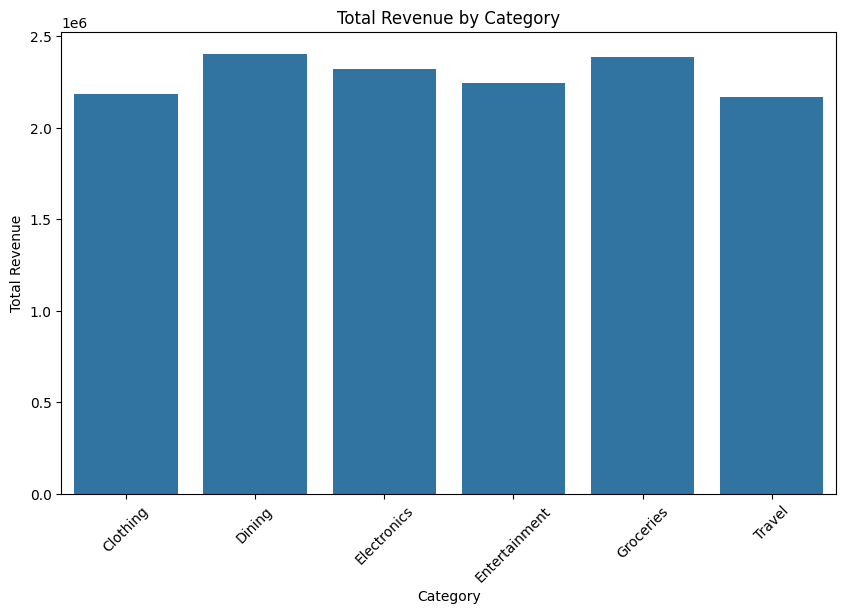

In [ ]:
#📊 Bonus Challenge (Optional)
#Create a bar chart showing the total transaction amount per Category using Matplotlib or Seaborn.

total_transaction_amount_per_Category= data.groupby('Category', as_index=False)['Amount'].sum()
plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Amount', data= total_transaction_amount_per_Category)
plt.title('Total Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
#plt.grid(True)
plt.show()


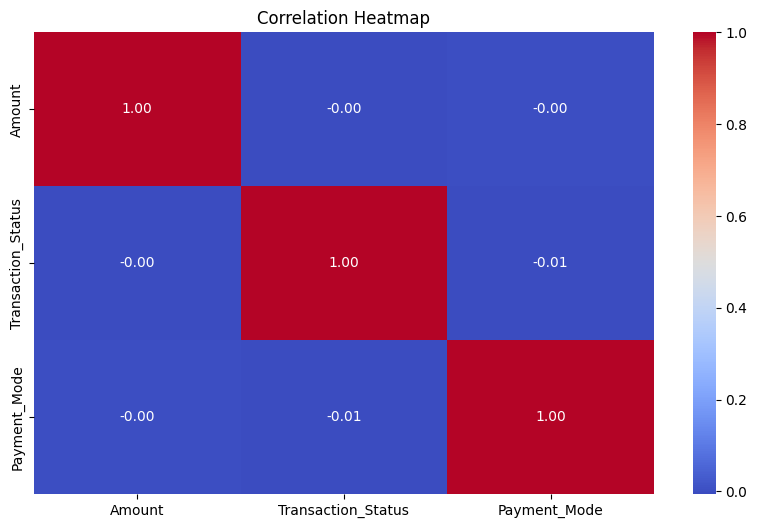

In [88]:
#Generate a heatmap showing correlation between Amount, Transaction_Status, and Payment_Mode.


# Assuming your DataFrame is named 'data' and contains 'Amount', 'Transaction_Status', and 'Payment_Mode'

# Step 1: Encode categorical columns
data['Transaction_Status'] = data['Transaction_Status'].astype('category').cat.codes
data['Payment_Mode'] = data['Payment_Mode'].astype('category').cat.codes

# Step 2: Select relevant columns and calculate correlation
correlation_matrix = data[['Amount', 'Transaction_Status', 'Payment_Mode']].corr()

# Step 3: Plot the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
